<a href="https://colab.research.google.com/github/SejalLambat19/Machine-Learning/blob/main/practical_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, mean_absolute_error,
    mean_squared_error
)

import matplotlib.pyplot as plt
from google.colab import files

file_path = r"/content/customer_churn_dataset-testing-master.csv"  # Adjust to your file path after uploading
df = pd.read_csv(file_path)

print("Dataset Preview:")
print(df.head())



Dataset Preview:
   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4             

In [ ]:
# Step 3: Preprocess the data
# Drop rows with missing values
df = df.dropna()

# Convert categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)




In [ ]:

# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:

# Model 2: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

# Step 5: Evaluate classification models
print("\nClassification Model Evaluation Metrics:")


Classification Model Evaluation Metrics:


In [ ]:
# Logistic Regression Evaluation
y_pred_lr = clf_lr.predict(X_test)
y_pred_proba_lr = clf_lr.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"ROC-AUC: {roc_auc_lr:.4f}")



Logistic Regression:
Accuracy: 0.8306
Precision: 0.8132
Recall: 0.8354
F1 Score: 0.8242
ROC-AUC: 0.9133


In [ ]:
# Random Forest Evaluation
y_pred_rf = clf_rf.predict(X_test)
y_pred_proba_rf = clf_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")



Random Forest Classifier:
Accuracy: 0.9967
Precision: 0.9999
Recall: 0.9931
F1 Score: 0.9965
ROC-AUC: 1.0000


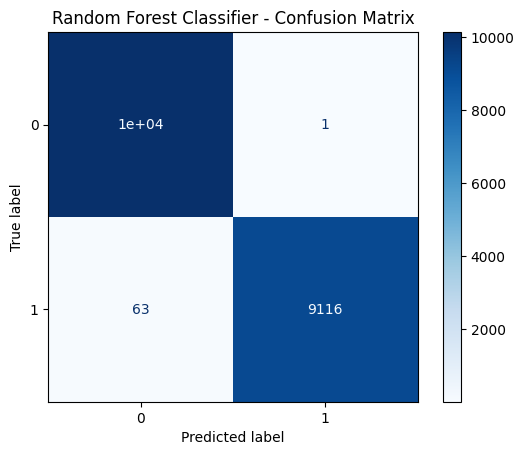

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap="Blues")
plt.title("Random Forest Classifier - Confusion Matrix")
plt.show()
